# Analyse des Données   

In [1]:
# importations des packages 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import Lasso


    


In [2]:
# Importation des données 
df = pd.read_csv ("Time-Wasters on Social Media.csv", index_col= "UserID" )
df.head(10)

,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
UserID,,,,,,,,,,,,,,,,,,,,,
1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,80,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,228,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,30,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,101,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,136,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
6,38,Male,Vietnam,45279,False,False,driver,Urban,Instagram,89,...,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Wi-Fi
7,56,Male,India,46201,False,False,Students,Rural,TikTok,247,...,8,2,Habit,Smartphone,Android,8:00 AM,10,0,At school,Wi-Fi
8,36,Male,Barzil,39715,False,False,Engineer,Rural,Instagram,191,...,3,7,Entertainment,Tablet,Android,9:00 PM,5,5,At home,Mobile Data
9,40,Male,United States,49309,False,False,Waiting staff,Rural,Instagram,34,...,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Mobile Data


In [3]:
# Affichage des informations sur les variables :
df.info() 


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   object
 2   Location                  1000 non-null   object
 3   Income                    1000 non-null   int64 
 4   Debt                      1000 non-null   bool  
 5   Owns Property             1000 non-null   bool  
 6   Profession                1000 non-null   object
 7   Demographics              1000 non-null   object
 8   Platform                  1000 non-null   object
 9   Total Time Spent          1000 non-null   int64 
 10  Number of Sessions        1000 non-null   int64 
 11  Video ID                  1000 non-null   int64 
 12  Video Category            1000 non-null   object
 13  Video Length              1000 non-null   int64 
 14  Engagement                100

In [4]:
df.describe()

,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


In [5]:
# information sur les valeurs manquantes :
df.isna().sum() #aucune valeurs manquantes !

Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

In [6]:
df["Age"].unique()

array([56, 46, 32, 60, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 61, 47,
       55, 50, 29, 42, 44, 59, 45, 33, 64, 54, 24, 26, 35, 21, 31, 43, 37,
       52, 34, 23, 51, 27, 48, 62, 58, 18, 22, 30, 49, 63], dtype=int64)

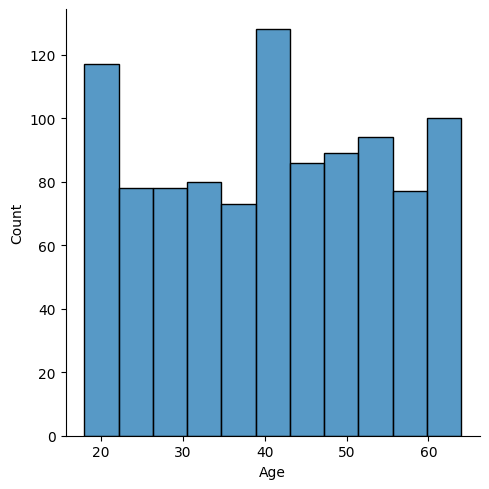

In [7]:

sns.displot(df["Age"])

<Axes: ylabel='Age'>

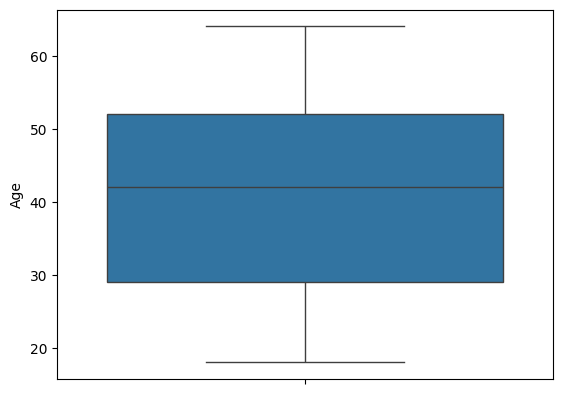

In [8]:
sns.boxplot(df["Age"])

<Axes: ylabel='Gender'>

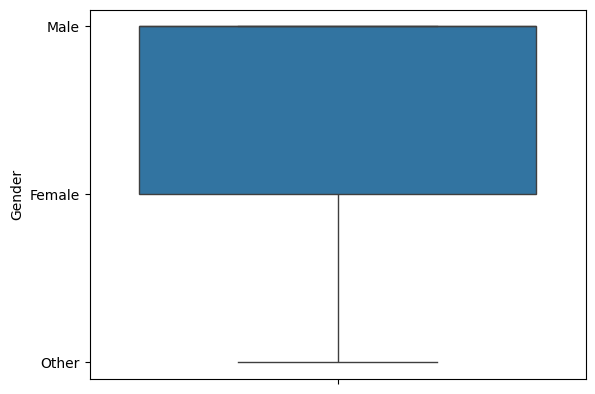

In [9]:
sns.boxplot (df["Gender"])

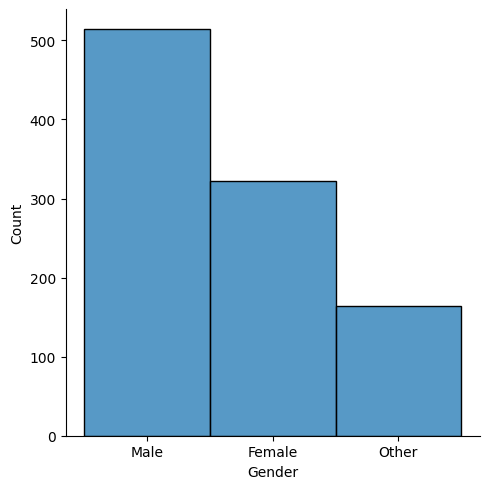

In [10]:
sns.displot(df["Gender"])

In [11]:
df["Location"].unique()


array(['Pakistan', 'Mexico', 'United States', 'Barzil', 'Vietnam',
       'India', 'Indonesia', 'Philippines', 'Japan', 'Germany'],
      dtype=object)

In [12]:
df.columns

Index(['Age', 'Gender', 'Location', 'Income', 'Debt', 'Owns Property',
       'Profession', 'Demographics', 'Platform', 'Total Time Spent',
       'Number of Sessions', 'Video ID', 'Video Category', 'Video Length',
       'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity',
       'ConnectionType'],
      dtype='object')

<Figure size 2000x2000 with 0 Axes>

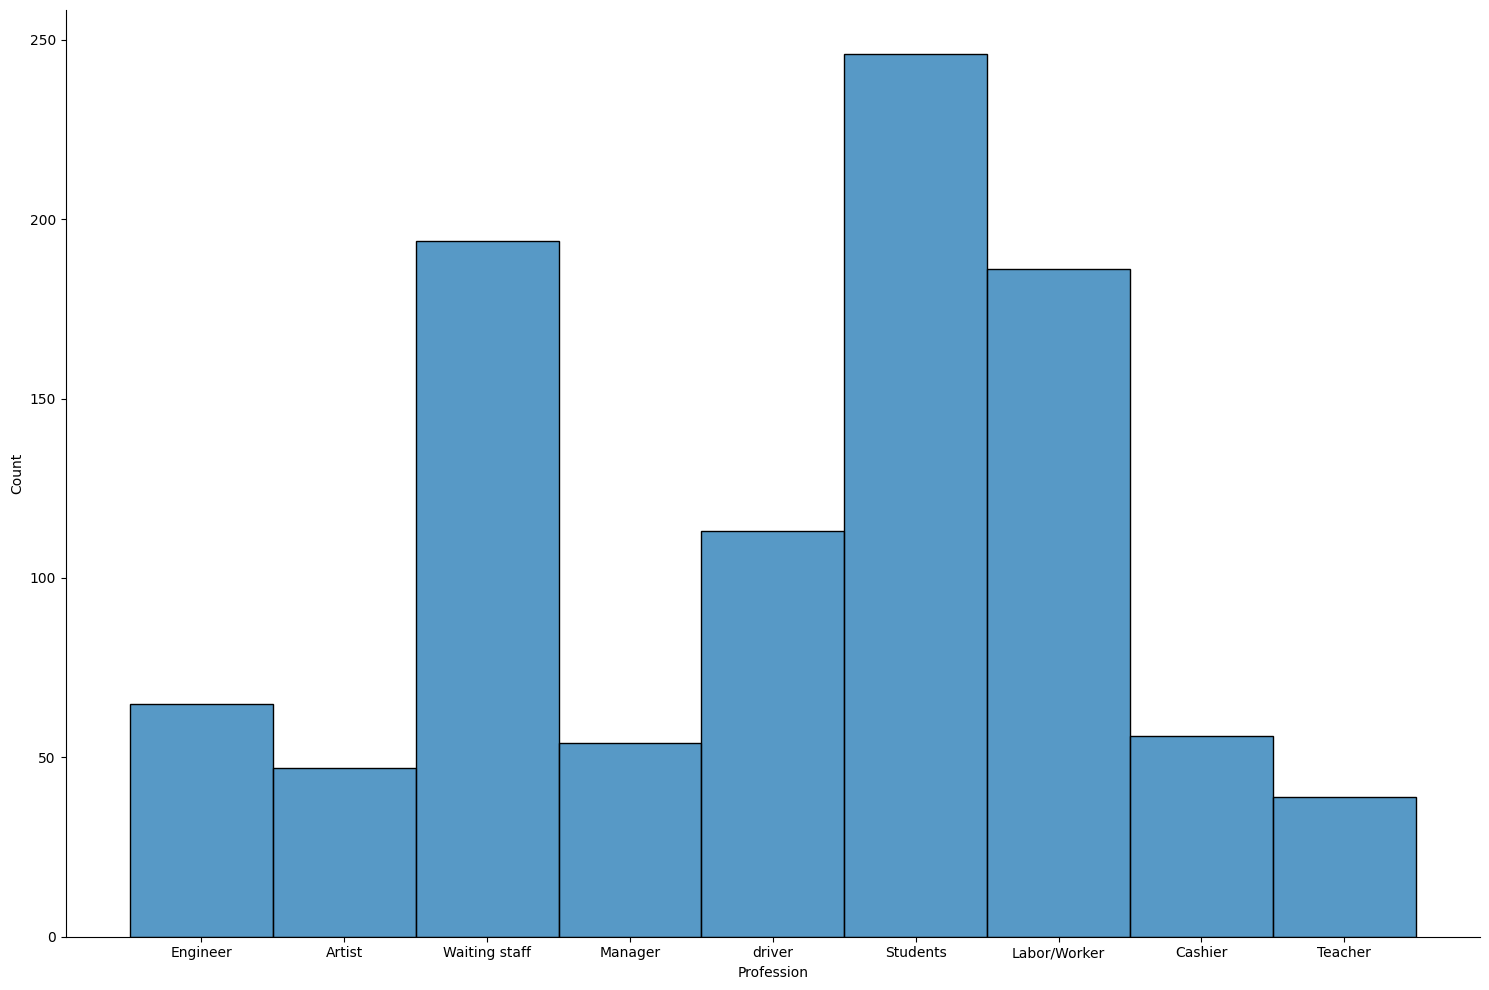

In [13]:
plt.figure(figsize=(20, 20))
sns.displot(df["Profession"], height=10, aspect=1.5)


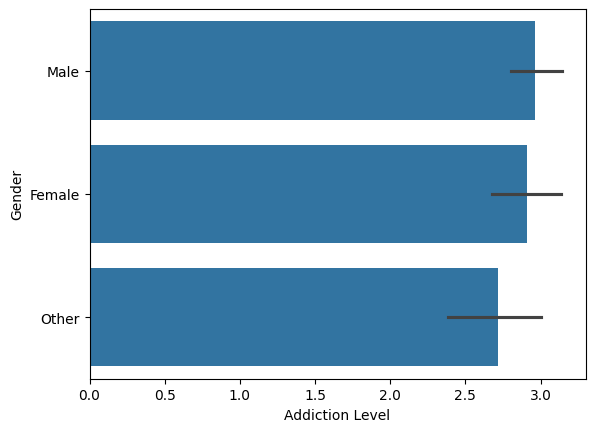

In [14]:
sns.barplot(data = df, x= "Addiction Level", y= "Gender"); 

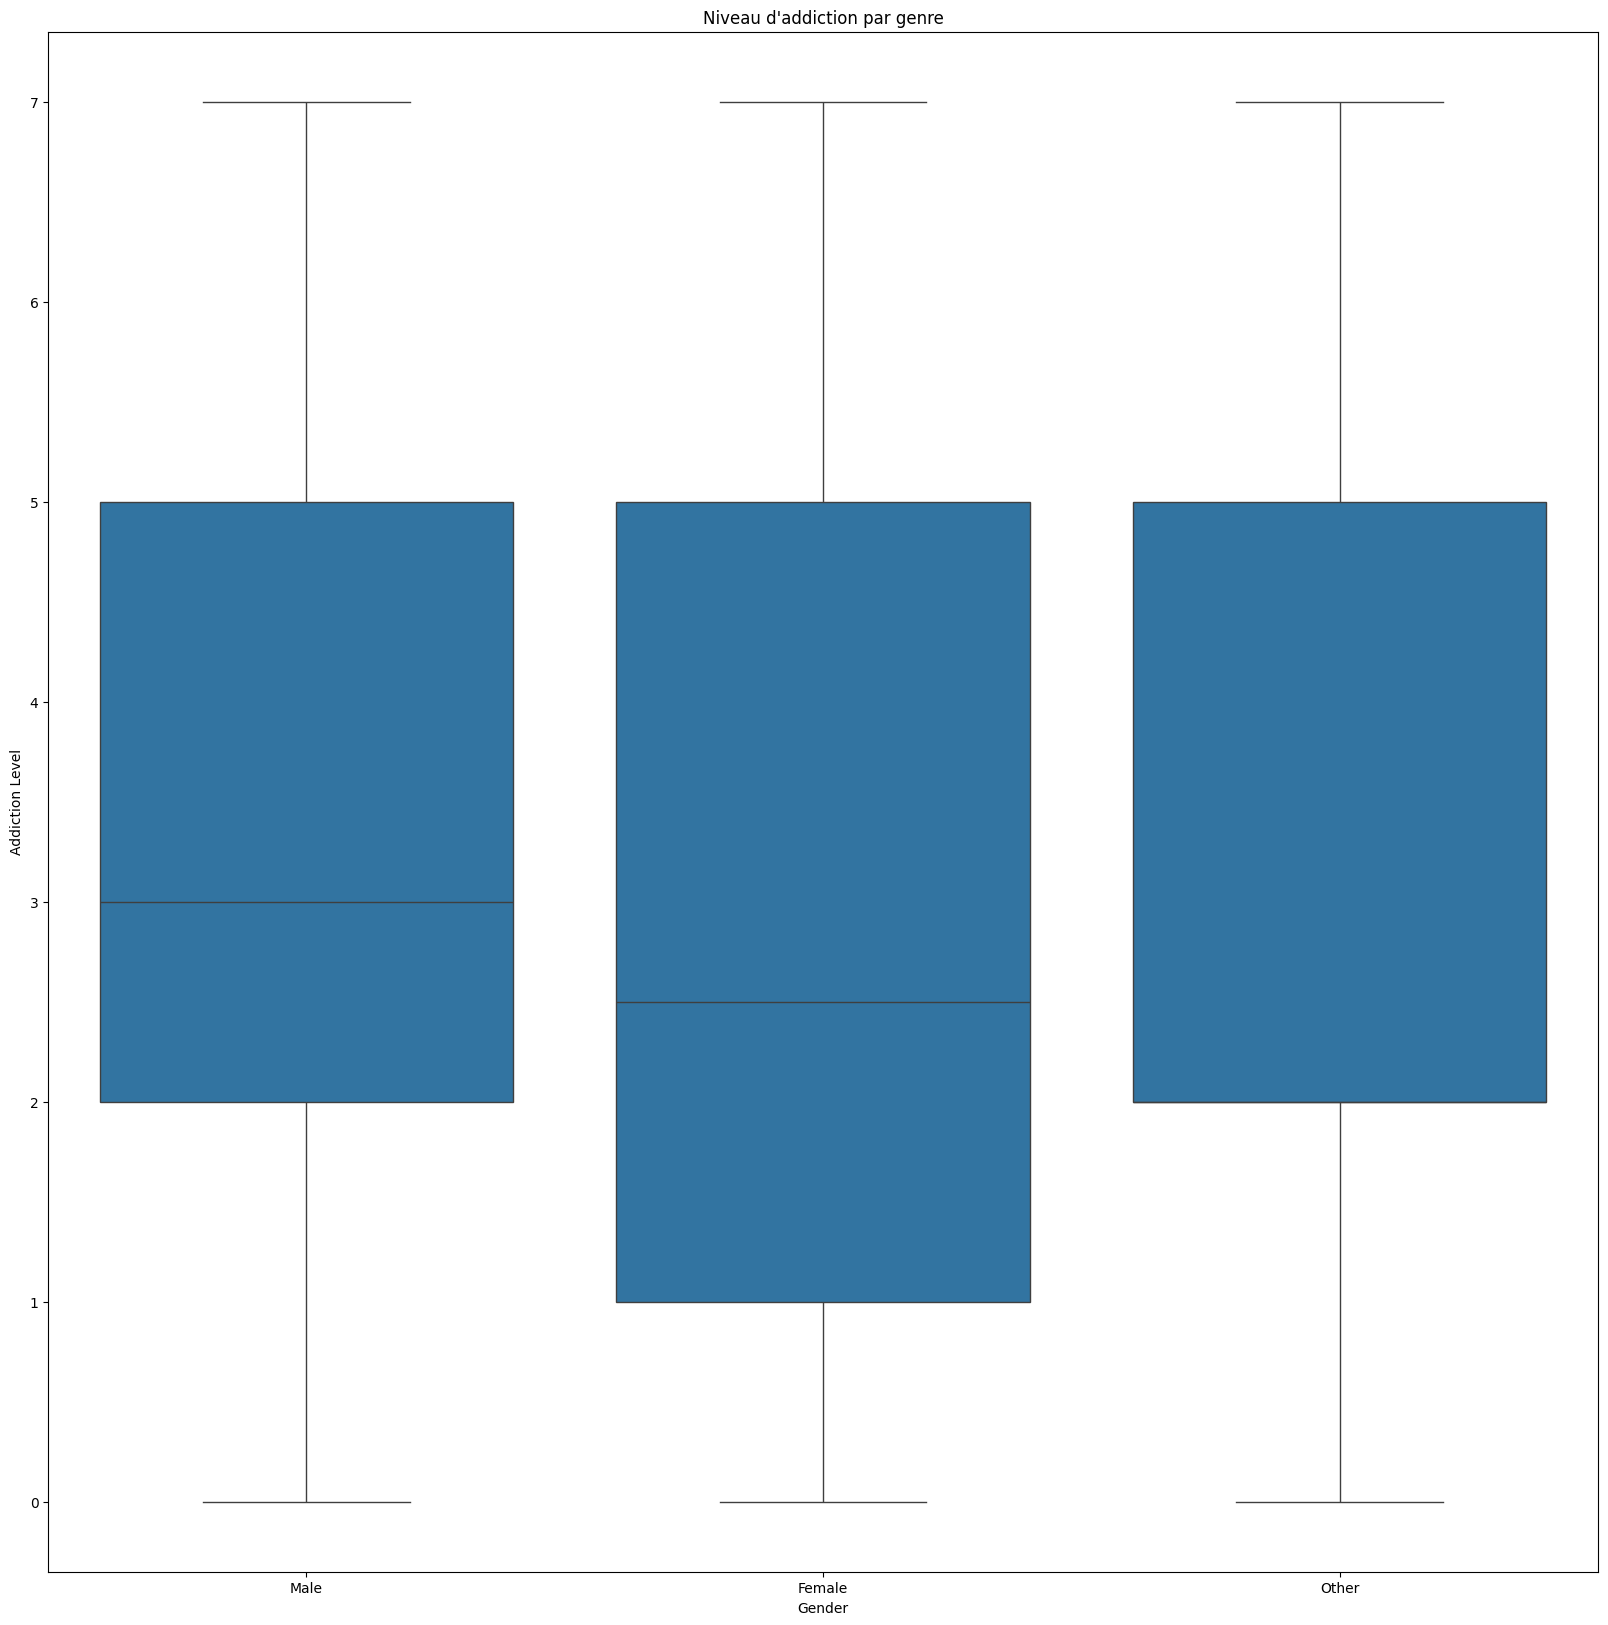

In [15]:
plt.figure (figsize = (20,20))
sns.boxplot(data=df, y ="Addiction Level", x="Gender")
plt.title ("Niveau d'addiction par genre");

Text(0.5, 1.0, 'Temps passé sur la vidéo par âge et genre')

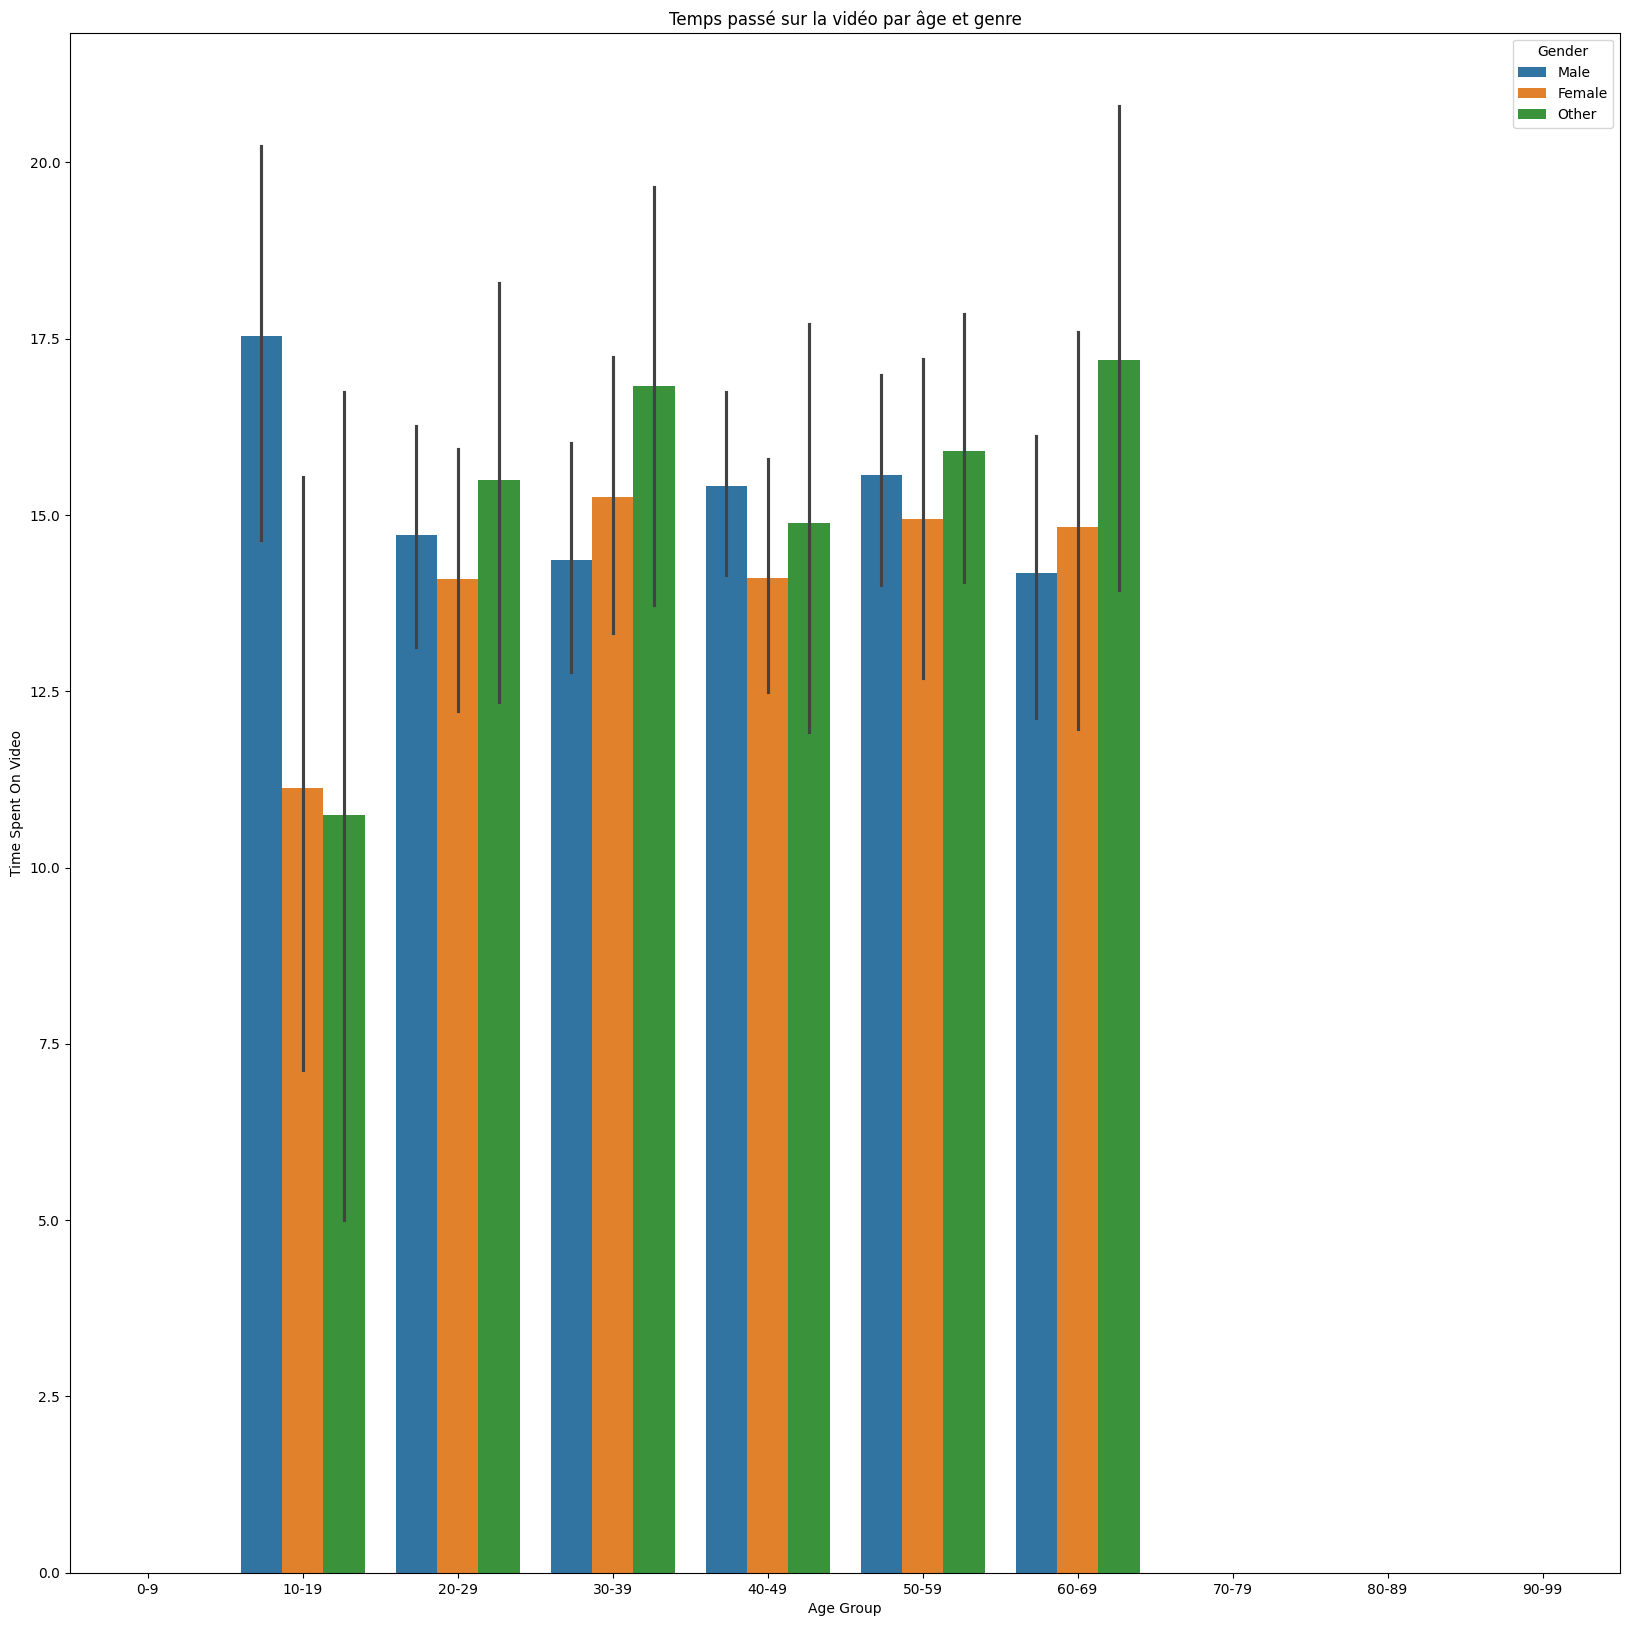

In [16]:
# Création des tranches d'âge par intervalles de 10 ans
df['Age Group'] = pd.cut(df['Age'], bins=range(0, 101, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

# Affichage du graphique
plt.figure(figsize=(20, 20))
sns.barplot(data=df, x="Age Group", y="Time Spent On Video", hue="Gender")


plt.title("Temps passé sur la vidéo par âge et genre")



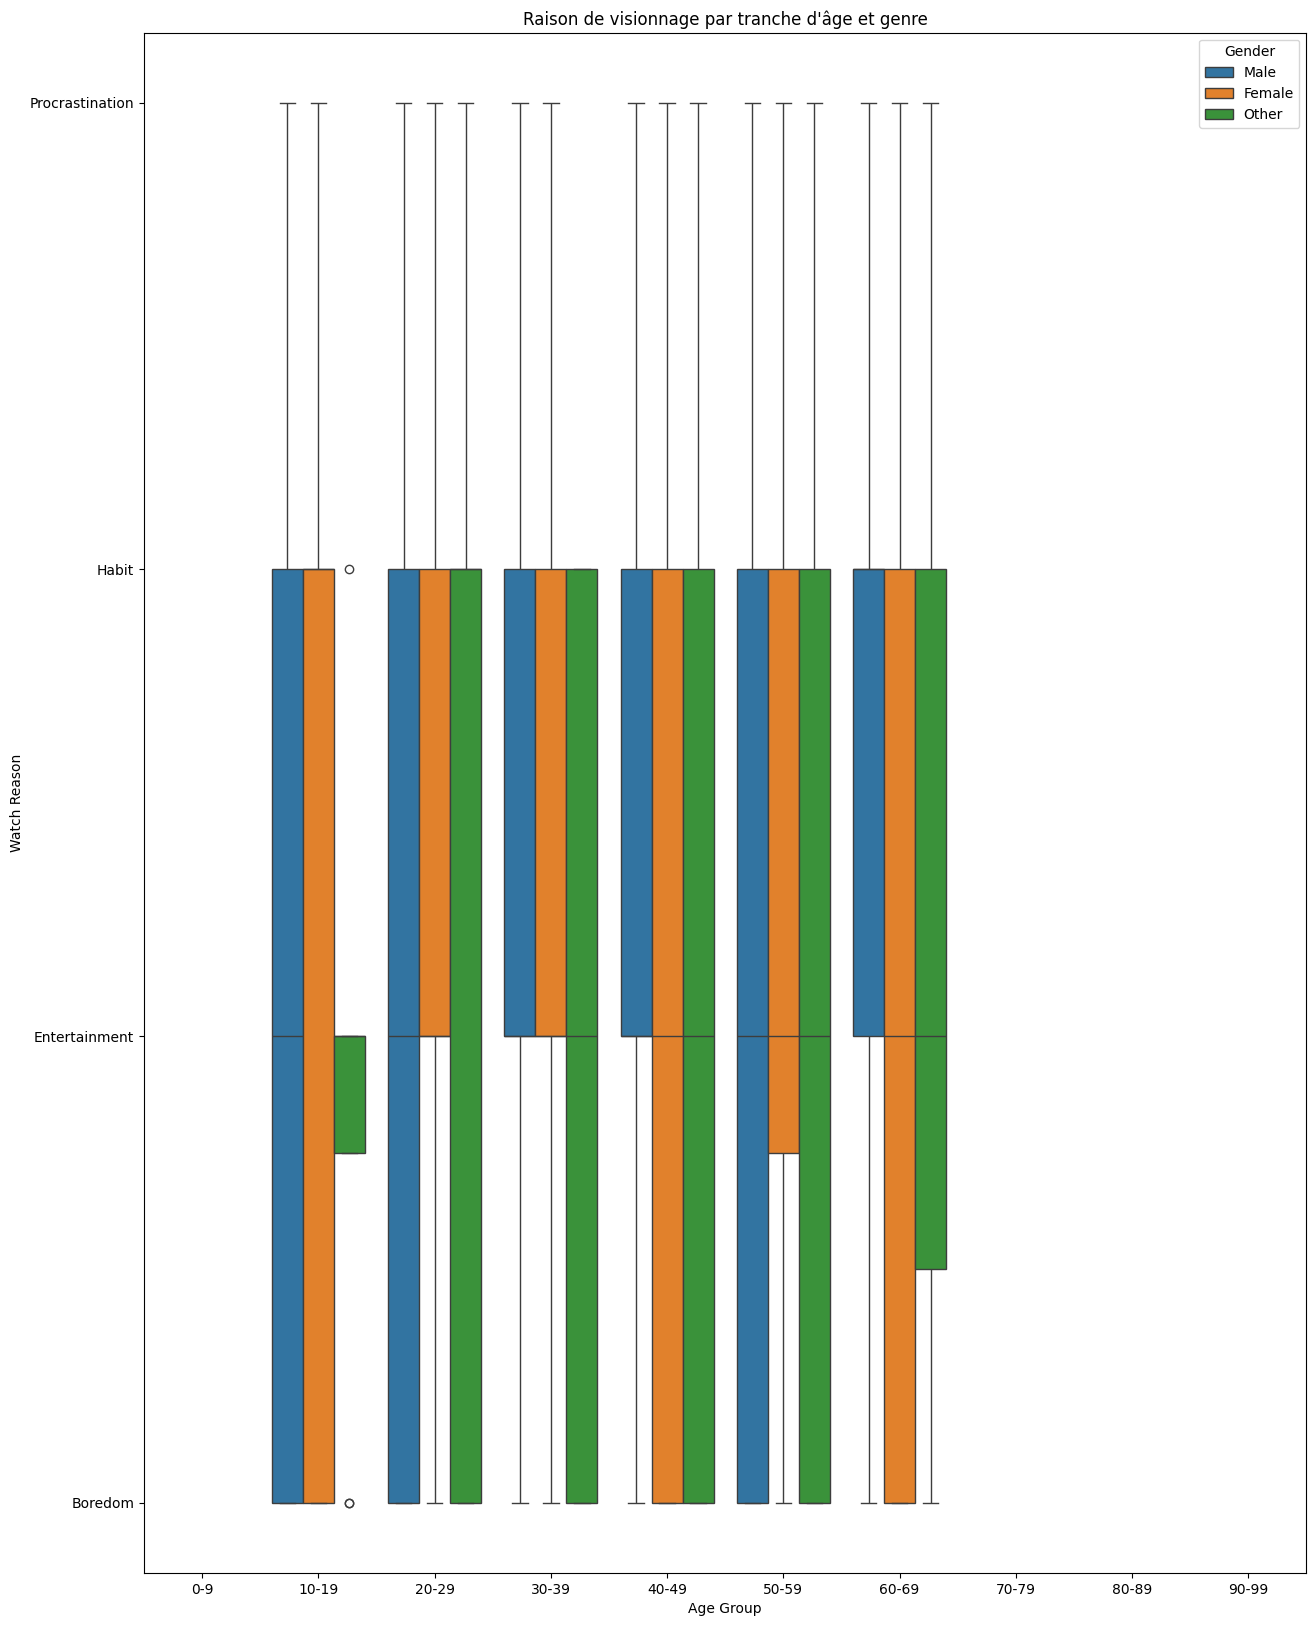

In [17]:
# Watch Reason
plt.figure(figsize=(15, 20))
sns.boxplot(data=df, x="Age Group", y="Watch Reason", hue="Gender",)


plt.title("Raison de visionnage par tranche d'âge et genre")

plt.show()


<Figure size 1500x2000 with 0 Axes>

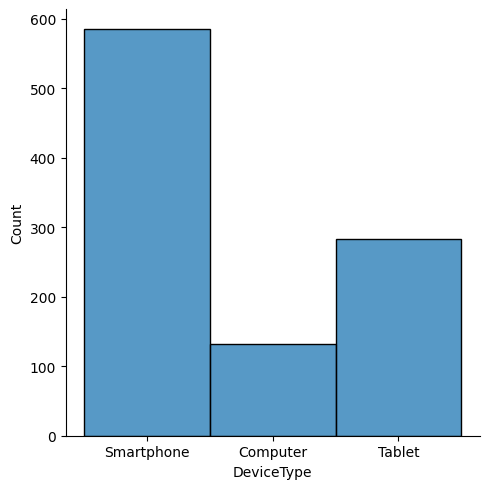

In [18]:
# DeviceType
plt.figure (figsize = (15,20))
sns.displot(data=df, x= "DeviceType") ;

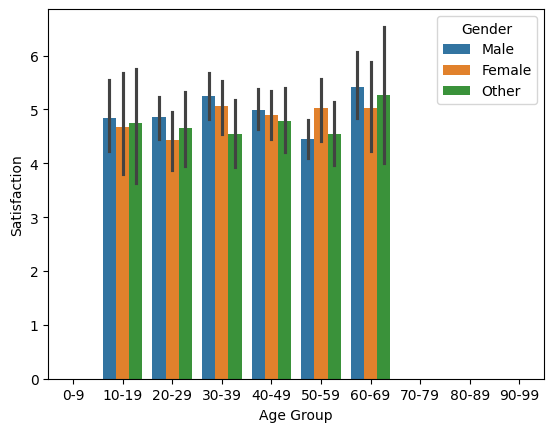

In [19]:
# Satisfaction
sns.barplot (df, x= "Age Group",y= "Satisfaction", hue= "Gender");

<Axes: xlabel='Satisfaction', ylabel='Video Category'>

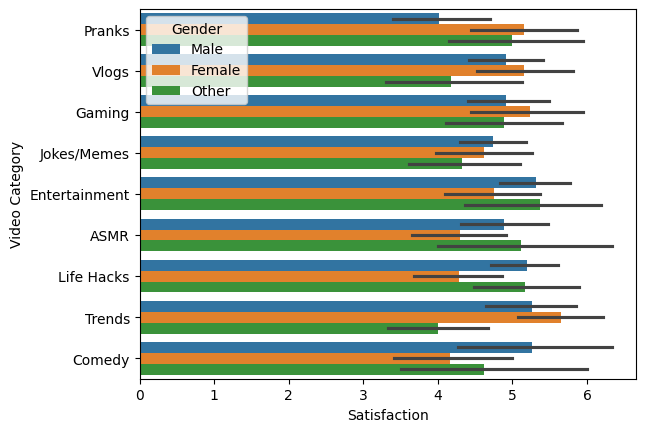

In [20]:
# Video Category
sns.barplot(df, x= "Satisfaction",y= "Video Category", hue ="Gender")

<Axes: xlabel='Location', ylabel='Addiction Level'>

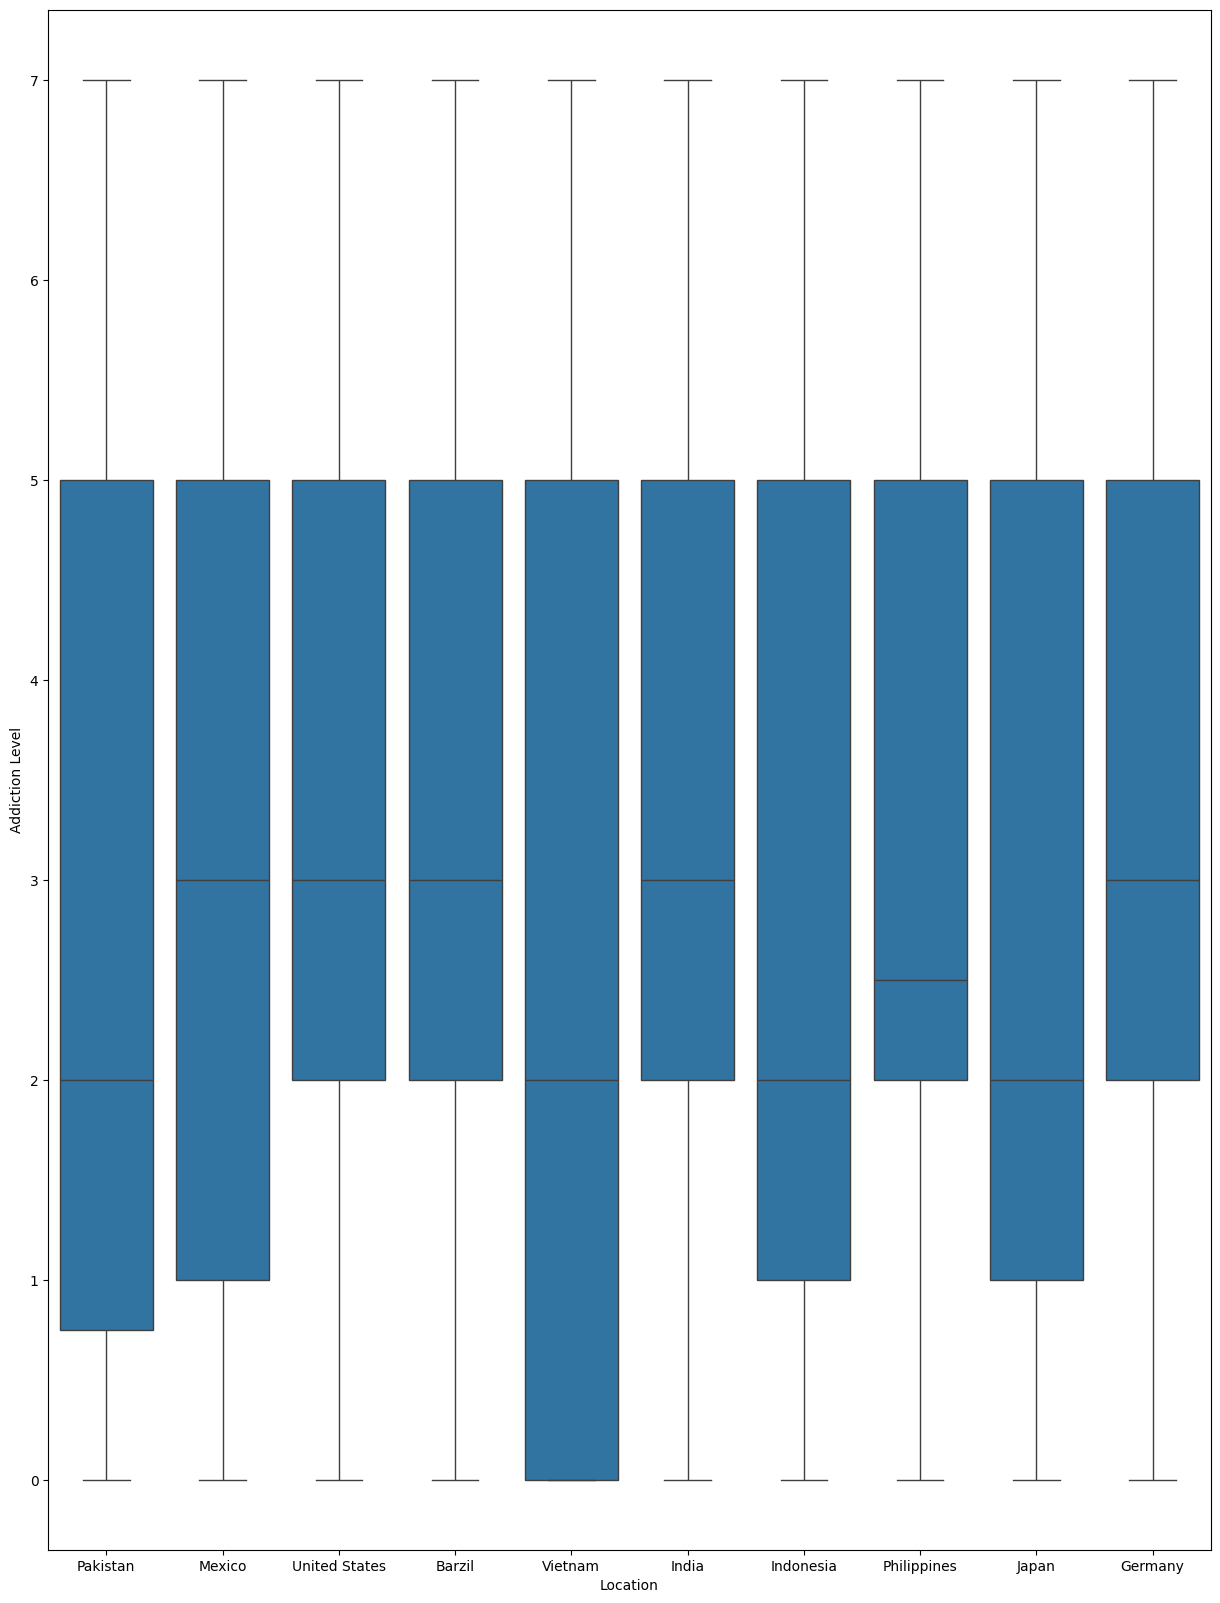

In [21]:
# Location
plt.figure (figsize= (15,20))
sns.boxplot (df, x= "Location", y= "Addiction Level")

In [22]:
# Self Control

<Figure size 2000x2000 with 0 Axes>

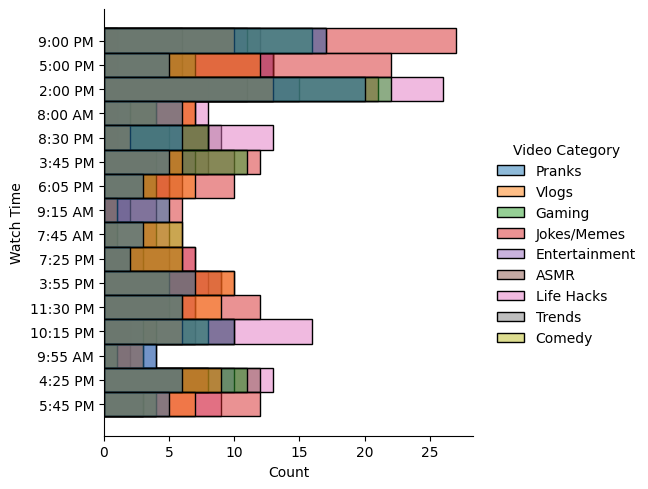

In [23]:
# 
plt.figure(figsize=(20,20))
sns.displot (df, y="Watch Time", hue = "Video Category")

<Axes: xlabel='Gender', ylabel='Video Category'>

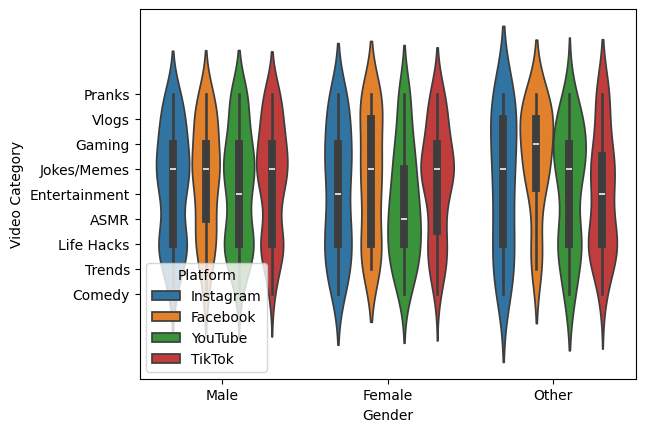

In [24]:
# Platforme et Catégorie de Védio 
sns.violinplot(data= df, hue = "Platform", x= "Gender", 
            y = "Video Category")

In [25]:
df["Scroll Rate"].unique()

array([87, 46, 88, 93,  4, 38, 63, 29, 19, 91, 35, 70, 23, 44, 48, 52,  8,
       55, 66, 77, 40, 85, 31, 61, 36, 13, 37, 47, 90, 71, 22, 39, 58, 30,
       18, 74, 94, 26,  7, 69, 65, 25, 32, 17, 79, 84, 15, 99,  6, 95, 45,
       82, 24, 14, 92, 75, 62, 89,  1, 33, 56, 98, 21, 20, 16, 67, 49, 59,
       97, 81, 41, 68,  9, 34, 64, 60,  3, 10, 51, 76, 86, 12, 53, 42, 78,
       43,  5, 96, 27, 11, 73, 72, 28, 50,  2, 54, 83, 57, 80],
      dtype=int64)

<Axes: xlabel='Gender', ylabel='Scroll Rate'>

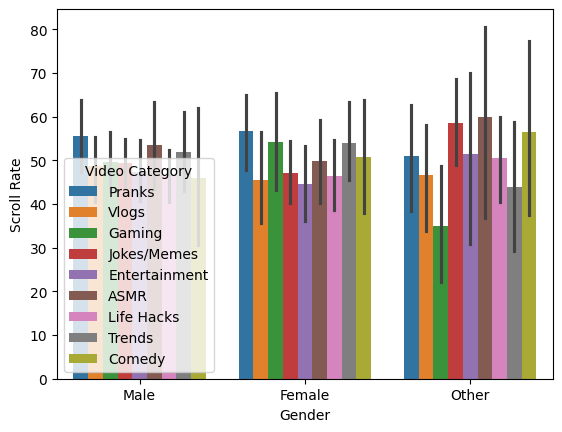

In [26]:
# Scroll Rate et Gender et Video 
sns.barplot(df, x = "Gender", y = "Scroll Rate", hue = "Video Category")


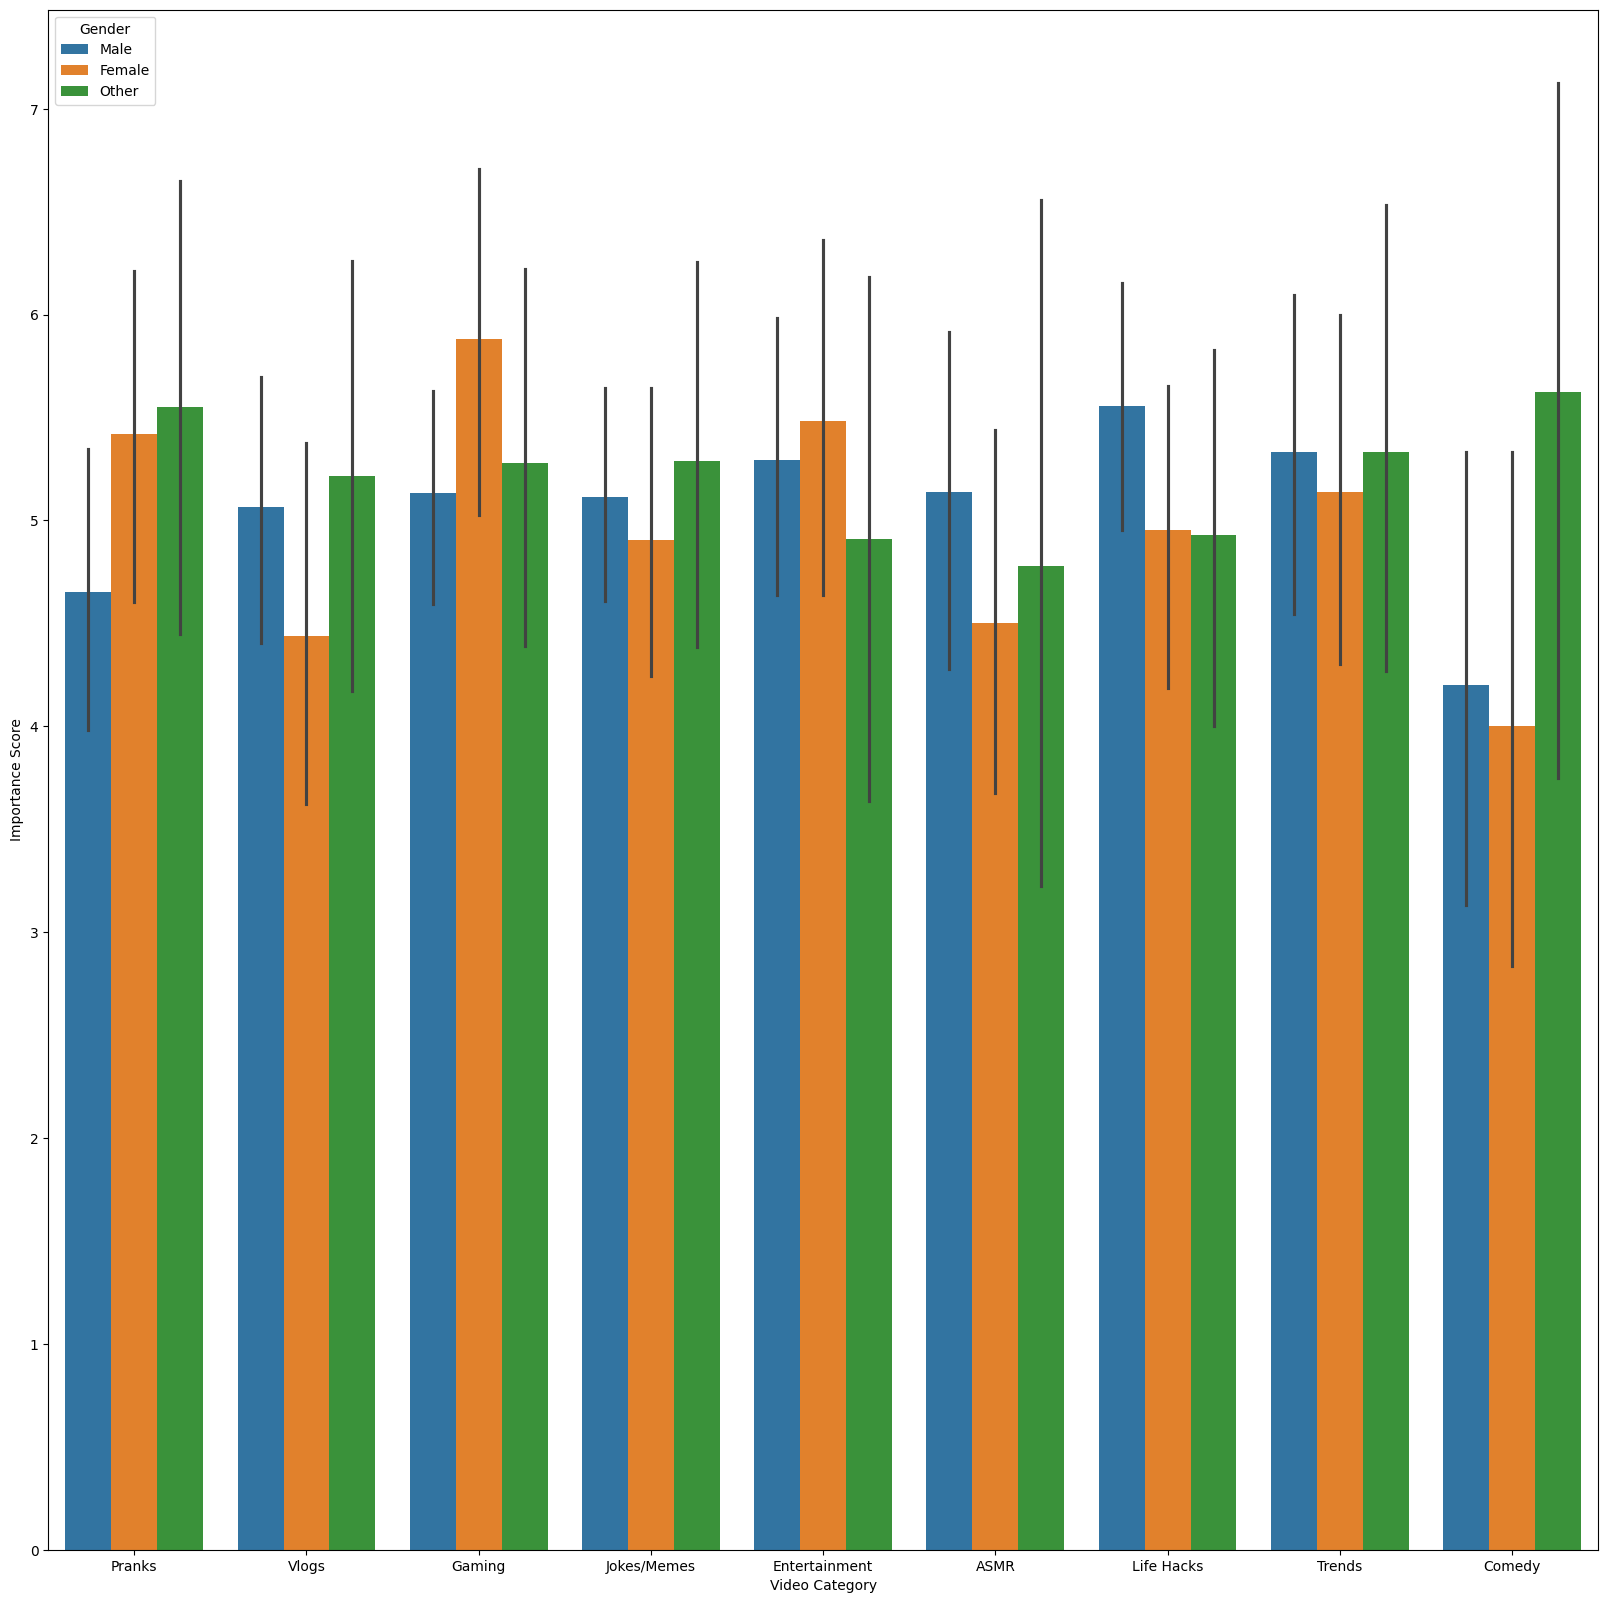

In [27]:
# Importance Score, 
plt.figure (figsize = (20, 20))
sns.barplot ( x= "Video Category", y= "Importance Score", hue= "Gender", data = df) ;

### Encodage des variables categorielles : 
  

- Les variables a sont  :
* Gender (object)
* Location (object)
* Profession (object)
* Demographics (object)
* Platform (object)
* Video Category (object)
* Frequency (object)
* Watch Reason (object)
* DeviceType (object)
* OS (object)
* Watch Time (object)
* CurrentActivity (object)
* ConnectionType (object)
* Debt (bool)
* Owns Property (bool)

1) Encodage binaire pour les variables booléennes :

In [28]:
# Encodage des variables booléennes en 0 et 1
df['Debt'] = df['Debt'].astype(int)
df['Owns Property'] = df['Owns Property'].astype(int)
